In [150]:
# Reference: https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

# Import all necessary libraries.
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
# Read SMS data base with pandas.
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
sms = pd.read_table(url, header=None, names=['label', 'message'])

# examine the first 10 rows
print(sms.head())

# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# Create feature and label vectors.
X = sms.message
y = sms.label_num

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [152]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [153]:
# Convert a collection of text documents into a matrix of token counts.
vect = CountVectorizer(binary=True)
# Learn the vocabulary dictionary and return term-document matrix.
# This is equivalent to fit followed by transform, but more efficiently implemented.
X_train_dtm = vect.fit_transform(X_train)

In [154]:
# Instantiate a Bernoulli Naive Bayes model.
nb = BernoulliNB(binarize=None)

In [155]:
# Train the MultinomialNB model.
nb.fit(X_train_dtm, y_train)

BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)

In [156]:
# Transform document into document-term matrix.
X_test_dtm = vect.transform(X_test)
# Perform classification on an array of test vectors X_test_dtm.
y_pred_class = nb.predict(X_test_dtm)

In [157]:
# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

0.9784637473079684

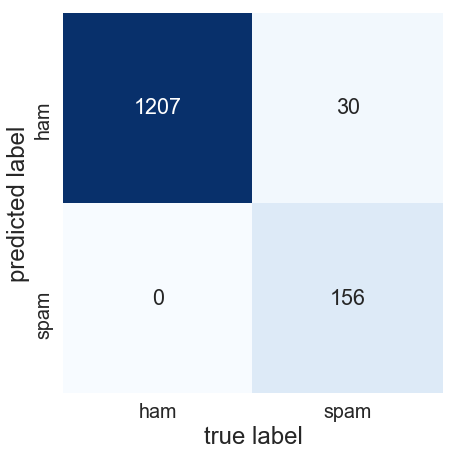

In [158]:
# Plot the confusion matrix
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label', fontsize=24)
plt.ylabel('predicted label', fontsize=24)
# Save figure
plt.savefig("confusion_matrix_spam_classification.png", dpi=600)
plt.show()

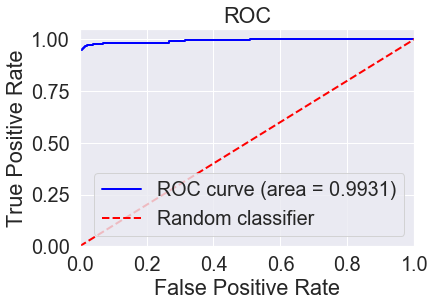

In [159]:
# Getting the probabilities for each class.
y_prob = nb.predict_proba(X_test_dtm)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc)
)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [160]:
# Print messages for the false positives (ham incorrectly classified as spam).
X_test[y_pred_class > y_test]

Series([], Name: message, dtype: object)

In [161]:
# Print messages for the false negatives (spam incorrectly classified as ham).
X_test[y_pred_class < y_test]

881     Reminder: You have not downloaded the content ...
3864    Oh my god! I've found your number again! I'm s...
2575    Your next amazing xxx PICSFREE1 video will be ...
2402    Babe: U want me dont u baby! Im nasty and have...
4527    I want some cock! My hubby's away, I need a re...
2663    Hello darling how are you today? I would love ...
751     Do you realize that in about 40 years, we'll h...
3463    Bloomberg -Message center +447797706009 Why wa...
4410    For your chance to WIN a FREE Bluetooth Headse...
2313    tddnewsletter@emc1.co.uk (More games from TheD...
227     Will u meet ur dream partner soon? Is ur caree...
3755    Bloomberg -Message center +447797706009 Why wa...
856     Talk sexy!! Make new friends or fall in love i...
3360    Sorry I missed your call let's talk when you h...
4506    Mobile Club: Choose any of the top quality ite...
3425    Am new 2 club & dont fink we met yet Will B gr...
2770    Burger King - Wanna play footy at a top stadiu...
5120         P

In [162]:
# Example of a false negative.
X_test[1893]

'CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+'

In [163]:
# Calculate predicted probabilities for X_test_dtm (poorly calibrated).
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
# Calculate AUC.
metrics.roc_auc_score(y_test, y_pred_prob)

0.9931047384878532

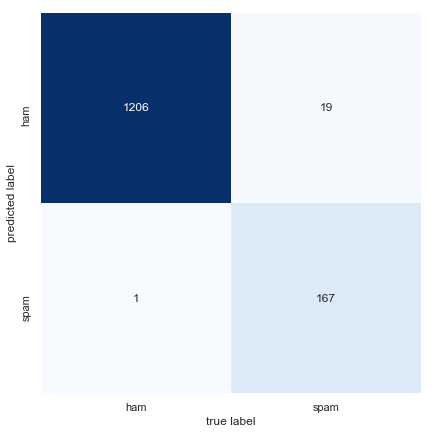

In [166]:
# remove English stop words
vect = CountVectorizer(binary=True, max_df=0.5, min_df=2)

# Learn the vocabulary dictionary and return term-document matrix.
X_train_dtm = vect.fit_transform(X_train)

# Instantiate a Multinomial Naive Bayes model.
nb = BernoulliNB(binarize=None)

# Train the MultinomialNB model.
nb.fit(X_train_dtm, y_train)

# Transform document into document-term matrix.
X_test_dtm = vect.transform(X_test)

# Perform classification on an array of test vectors X_test_dtm.
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

# Plot the confusion matrix
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

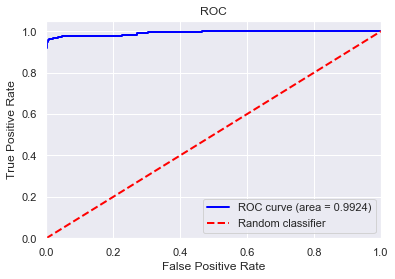

In [167]:
# Getting the probabilities for each class.
y_prob = nb.predict_proba(X_test_dtm)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc)
)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()